In [1]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from comparers import LogisticRegressionVsXGBComparer
from comparers import X, y
import shap
import numpy as np

In [2]:
%matplotlib inline

In [3]:
comparer = LogisticRegressionVsXGBComparer()
comparer.load_or_train()

# Check different prediction functions
## Check probability estimates

In [5]:
predictions_proba_a = comparer.model_a.predict_proba(X)
predictions_proba_b = comparer.model_b.predict_proba(X)

CPU times: user 6.13 ms, sys: 2.88 ms, total: 9 ms
Wall time: 8.87 ms


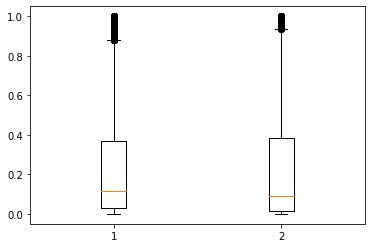

In [55]:
plt.boxplot([predictions_proba_a, predictions_proba_b]);

In [64]:
pd.Series(predictions_proba_a).describe()

count    32561.000000
mean         0.240557
std          0.274355
min          0.000154
25%          0.029669
50%          0.117442
75%          0.369043
max          1.000000
dtype: float64

In [65]:
pd.Series(predictions_proba_b).describe()

count    32561.000000
mean         0.240839
std          0.297715
min          0.000035
25%          0.015336
50%          0.091841
75%          0.383971
max          0.999540
dtype: float64

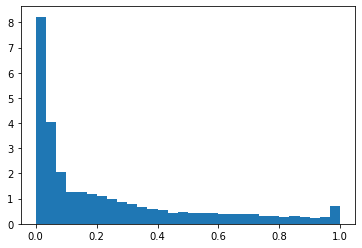

In [57]:
plt.hist(predictions_proba_a, density=True, bins=30);

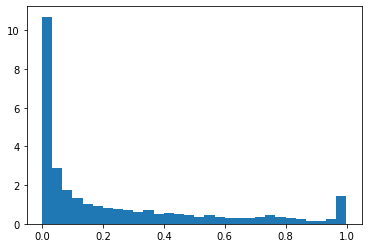

In [58]:
plt.hist(predictions_proba_b, density=True, bins=30);

## Check odds ratios estimates

In [59]:
predictions_odds_a = comparer.model_a.predict_odds(X)
predictions_odds_b = comparer.model_b.predict_odds(X)

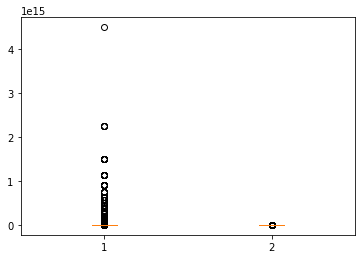

In [60]:
plt.boxplot([predictions_odds_a, predictions_odds_b]);

In [62]:
pd.Series(predictions_odds_a).describe()

count    3.256100e+04
mean     2.778208e+12
std      5.885520e+13
min      1.539281e-04
25%      3.057618e-02
50%      1.330699e-01
75%      5.848932e-01
max      4.503600e+15
dtype: float64

In [63]:
pd.Series(predictions_odds_b).describe()

count    32561.000000
mean        16.182564
std        102.561470
min          0.000035
25%          0.015574
50%          0.101129
75%          0.623301
max       2171.651611
dtype: float64

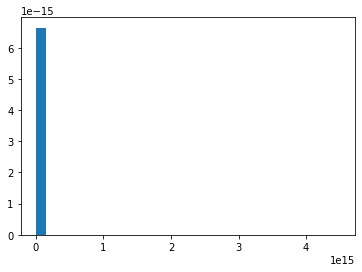

In [49]:
plt.hist(predictions_odds_a, density=True, bins=30);

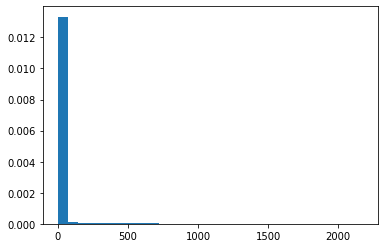

In [50]:
plt.hist(predictions_odds_b, density=True, bins=30);

## Check log odds estimates

In [68]:
predictions_logit_a = comparer.model_a.predict_logit(X)
predictions_logit_a_manual = np.log(comparer.model_a.predict_odds(X))
predictions_logit_b = comparer.model_b.predict_logit(X)

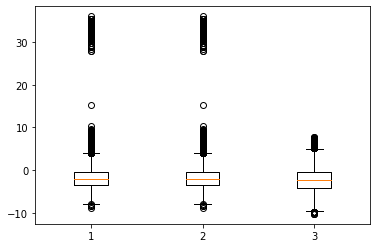

In [69]:
plt.boxplot([predictions_logit_a, predictions_logit_a_manual, predictions_logit_b]);

In [39]:
pd.Series(predictions_logit_a).describe()

count    32561.000000
mean        -1.726853
std          3.284088
min         -8.779025
25%         -3.487534
50%         -2.016880
75%         -0.536326
max         36.043653
dtype: float64

In [40]:
pd.Series(predictions_logit_b).describe()

count    32561.000000
mean        -2.235792
std          2.966678
min        -10.270814
25%         -4.162123
50%         -2.291360
75%         -0.472726
max          7.683243
dtype: float64

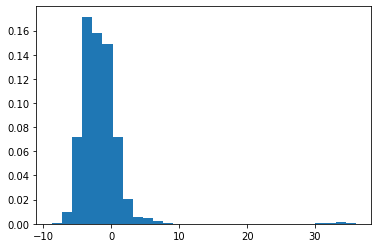

In [73]:
plt.hist(predictions_logit_a, density=True, bins=30);

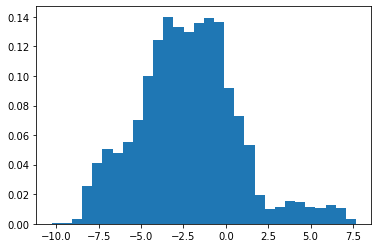

In [74]:
plt.hist(predictions_logit_b, density=True, bins=30);

# Check difference functions

## Probability difference

In [76]:
diff_proba = predictions_proba_b - predictions_proba_a

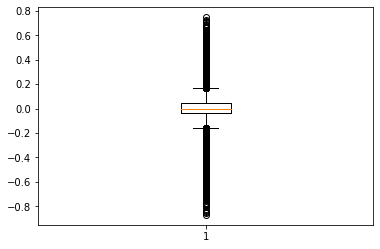

In [77]:
plt.boxplot(diff_proba);

In [78]:
pd.Series(diff_proba).describe()

count    32561.000000
mean         0.000281
std          0.122777
min         -0.870357
25%         -0.034862
50%         -0.001404
75%          0.046959
max          0.748700
dtype: float64

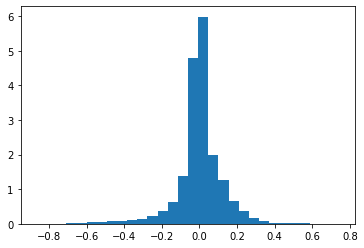

In [79]:
plt.hist(diff_proba, density=True, bins=30);

## Absolute probability difference

In [111]:
diff_proba_abs = abs(predictions_proba_b - predictions_proba_a)

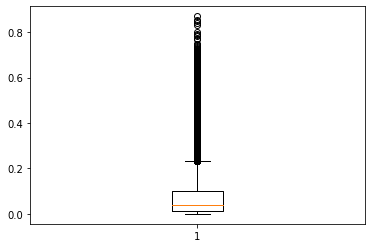

In [112]:
plt.boxplot(diff_proba_abs);

In [113]:
pd.Series(diff_proba_abs).describe()

count    3.256100e+04
mean     7.509660e-02
std      9.713164e-02
min      2.656267e-08
25%      1.231873e-02
50%      3.992046e-02
75%      1.002187e-01
max      8.703569e-01
dtype: float64

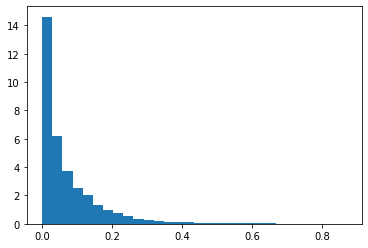

In [114]:
plt.hist(diff_proba_abs, density=True, bins=30);

## Difference of odds ratios

In [80]:
diff_odds = predictions_odds_b - predictions_odds_a

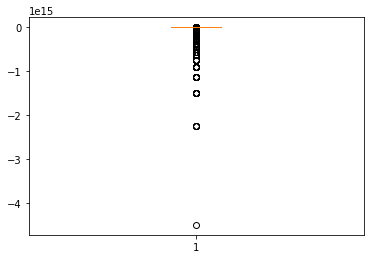

In [81]:
plt.boxplot(diff_odds);

In [82]:
pd.Series(diff_odds).describe()

count    3.256100e+04
mean    -2.778208e+12
std      5.885520e+13
min     -4.503600e+15
25%     -4.755400e-02
50%     -1.771265e-03
75%      1.059523e-01
max      1.809112e+03
dtype: float64

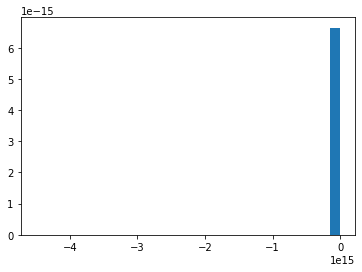

In [83]:
plt.hist(diff_odds, density=True, bins=30);

## Difference of log of odds

In [85]:
diff_logit = predictions_logit_b - predictions_logit_a

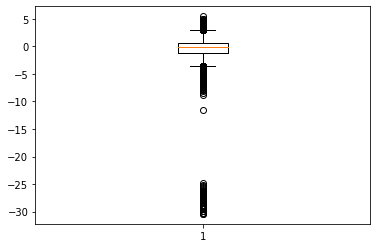

In [86]:
plt.boxplot(diff_logit);

In [87]:
pd.Series(diff_logit).describe()

count    32561.000000
mean        -0.508938
std          2.424743
min        -30.419872
25%         -1.110734
50%         -0.045999
75%          0.544772
max          5.474354
dtype: float64

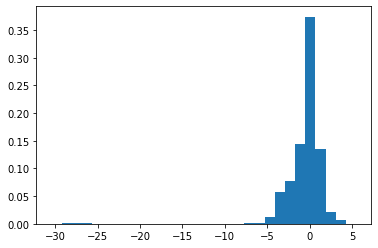

In [88]:
plt.hist(diff_logit, density=True, bins=30);

## Probability similarity

In [89]:
simil_proba = predictions_proba_a * predictions_proba_b

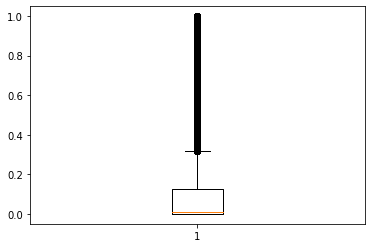

In [90]:
plt.boxplot(simil_proba);

In [91]:
pd.Series(simil_proba).describe()

count    3.256100e+04
mean     1.323487e-01
std      2.435934e-01
min      1.137133e-07
25%      4.041357e-04
50%      9.114070e-03
75%      1.277623e-01
max      9.992418e-01
dtype: float64

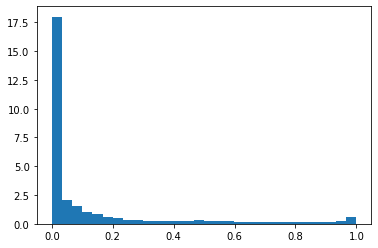

In [92]:
plt.hist(simil_proba, density=True, bins=30);

## Sum of log of odds
> In case you want to multiply those probabilities, they are often getting really small.If you add enough probabilities between > 0 and < 1, you will at some point run intofloating point precision issues. Instead you can use the sum of logarithms. https://www.reddit.com/r/MLQuestions/comments/5lzv9o/sklearn_why_predict_log_proba/

In [93]:
sum_logits = predictions_logit_a + predictions_logit_b

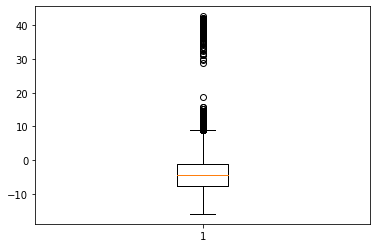

In [94]:
plt.boxplot(sum_logits);

In [95]:
pd.Series(sum_logits).describe()

count    32561.000000
mean        -3.962645
std          5.770048
min        -15.988641
25%         -7.758486
50%         -4.470016
75%         -1.104962
max         42.740353
dtype: float64

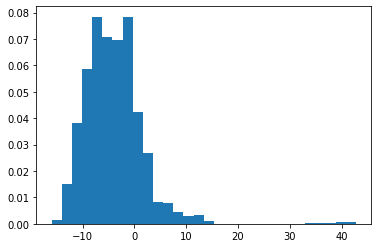

In [96]:
plt.hist(sum_logits, density=True, bins=30);

## Odds ratios

In [97]:
ratio_odds = predictions_odds_b / predictions_odds_a

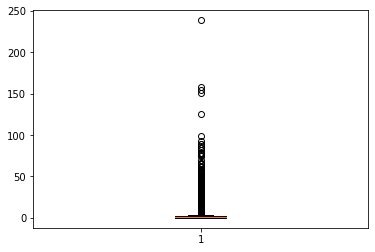

In [98]:
plt.boxplot(ratio_odds);

In [99]:
pd.Series(ratio_odds).describe()

count    3.256100e+04
mean     1.762513e+00
std      4.627057e+00
min      6.149182e-14
25%      3.293173e-01
50%      9.550426e-01
75%      1.724216e+00
max      2.384962e+02
dtype: float64

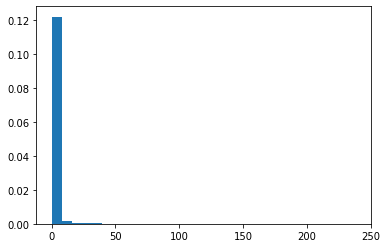

In [100]:
plt.hist(ratio_odds, density=True, bins=30);

## Odds similarity

In [102]:
simil_odds = predictions_odds_a * predictions_odds_b

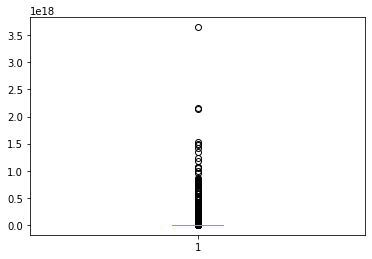

In [103]:
plt.boxplot(simil_odds);

In [104]:
pd.Series(simil_odds).describe()

count    3.256100e+04
mean     1.712773e+15
std      4.250583e+16
min      1.138208e-07
25%      4.271026e-04
50%      1.144714e-02
75%      3.312236e-01
max      3.646693e+18
dtype: float64

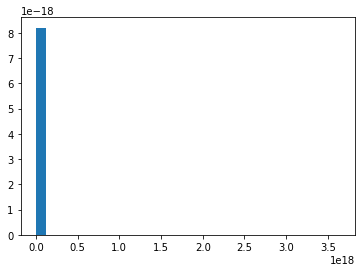

In [105]:
plt.hist(simil_odds, density=True, bins=30);

## Probability of predictions being different

In [107]:
proba_predictions__different = \
    (predictions_proba_b - predictions_proba_a * predictions_proba_b) + \
    (predictions_proba_a - predictions_proba_a * predictions_proba_b)

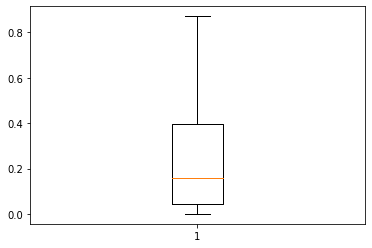

In [108]:
plt.boxplot(proba_predictions__different);

In [109]:
pd.Series(proba_predictions__different).describe()

count    32561.000000
mean         0.216698
std          0.184267
min          0.000757
25%          0.045301
50%          0.157127
75%          0.396814
max          0.870608
dtype: float64

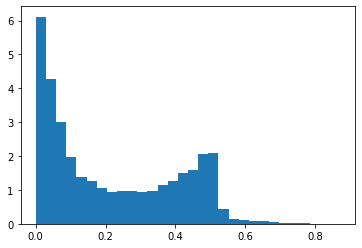

In [110]:
plt.hist(proba_predictions__different, density=True, bins=30);